In [72]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [73]:
df = pd.read_excel("premiums_rest.xlsx")
df.head()

,Unnamed: 0,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,5,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610


In [74]:
df['Genetical_Risk'] = 0

In [75]:
df.shape

(29904, 15)

In [76]:
df.columns

Index(['Unnamed: 0', 'Age', 'Gender', 'Region', 'Marital_status',
       'Number Of Dependants', 'BMI_Category', 'Smoking_Status',
       'Employment_Status', 'Income_Level', 'Income_Lakhs', 'Medical History',
       'Insurance_Plan', 'Annual_Premium_Amount', 'Genetical_Risk'],
      dtype='object')

In [77]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [78]:
df.isna().sum()

unnamed:_0               0
age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           9
employment_status        1
income_level             9
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [79]:
df.dropna(inplace=True)

### Handle NA Values

In [80]:
df.isna().sum()

unnamed:_0               0
age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [81]:
df.duplicated().sum()

np.int64(0)

In [82]:
df.describe()

,unnamed:_0,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29886.000000,29886.000000,29886.000000,29886.000000,29886.000000,29886.0
mean,25027.094091,43.396105,2.379910,23.364184,20892.303821,0.0
std,14432.632929,13.412657,1.431201,24.740339,6936.813440,0.0
min,0.000000,26.000000,-3.000000,1.000000,3625.000000,0.0
25%,12599.250000,34.000000,1.000000,7.000000,15697.250000,0.0
50%,25067.500000,42.000000,3.000000,17.000000,20489.000000,0.0
75%,37563.750000,52.000000,3.000000,32.000000,26360.000000,0.0
max,49999.000000,356.000000,5.000000,930.000000,43471.000000,0.0


In [83]:
df[df["number_of_dependants"] < 0]

,unnamed:_0,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
1805,2986,34,Female,Southeast,Married,-1,Underweight,Regular,Self-Employed,25L - 40L,35,High blood pressure & Heart disease,Silver,22995,0
2273,3756,41,Male,Southwest,Married,-1,Obesity,Regular,Salaried,10L - 25L,21,Diabetes,Silver,22766,0
3513,5846,56,Male,Southwest,Married,-3,Normal,Occasional,Salaried,10L - 25L,16,Thyroid,Bronze,11979,0
3904,6498,26,Male,Southeast,Married,-1,Obesity,Occasional,Freelancer,25L - 40L,27,No Disease,Silver,18269,0
4900,8189,37,Male,Northwest,Married,-1,Overweight,Regular,Self-Employed,<10L,8,Diabetes,Bronze,13664,0
5917,9933,42,Female,Southeast,Unmarried,-3,Overweight,Regular,Self-Employed,<10L,8,Diabetes & Heart disease,Bronze,17779,0
7095,11962,50,Female,Northwest,Married,-3,Normal,Occasional,Salaried,<10L,4,Diabetes & High blood pressure,Silver,21957,0
7222,12188,47,Male,Northwest,Unmarried,-3,Overweight,Occasional,Self-Employed,10L - 25L,19,No Disease,Gold,27457,0
7551,12732,39,Male,Southwest,Unmarried,-1,Overweight,Occasional,Self-Employed,25L - 40L,40,High blood pressure,Silver,18406,0
9047,15219,47,Male,Northwest,Married,-1,Overweight,Occasional,Self-Employed,25L - 40L,27,High blood pressure,Gold,29812,0


In [84]:
df['number_of_dependants'].unique()

array([ 0,  2,  3,  4,  1,  5, -1, -3])

In [85]:
df["number_of_dependants"] = abs(df["number_of_dependants"])
df["number_of_dependants"].describe()

count    29886.000000
mean         2.385933
std          1.421137
min          0.000000
25%          1.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: number_of_dependants, dtype: float64

In [86]:
numeric_columns = df.select_dtypes(['float64','int64']).columns

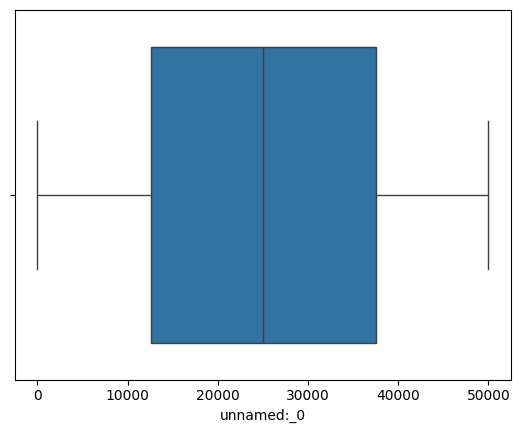

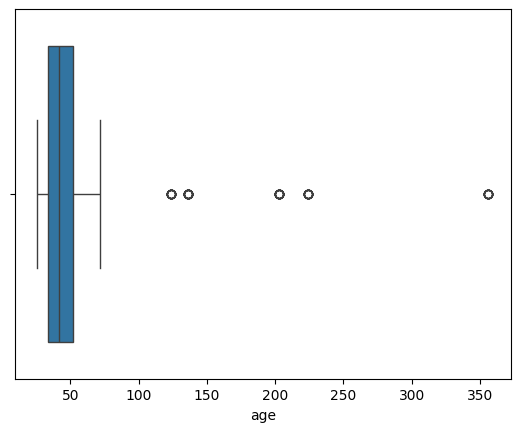

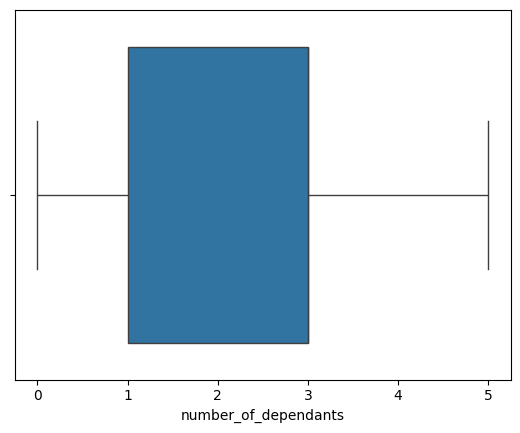

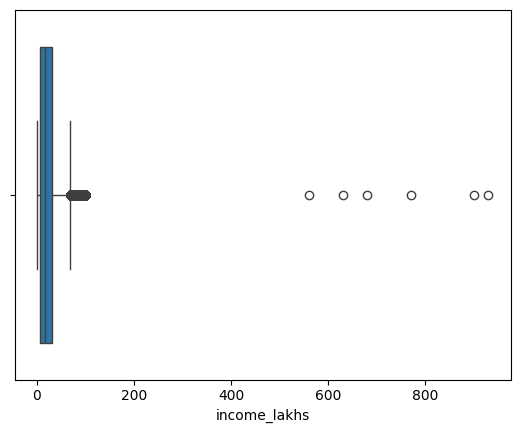

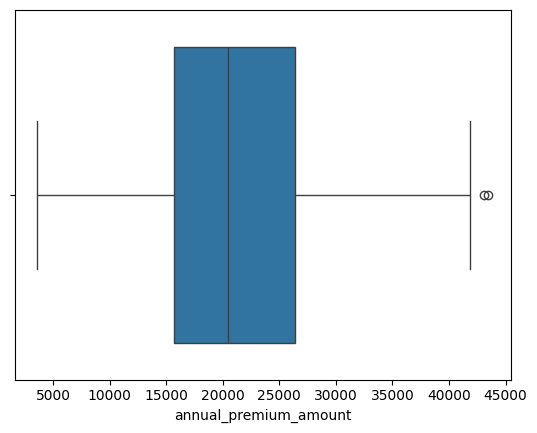

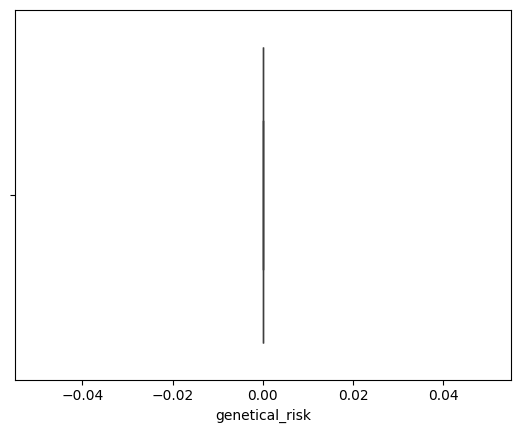

In [87]:
for col in numeric_columns:
    sns.boxplot(x=df[col])
    plt.show()

In [88]:
df[df["age"] > 100]["age"].unique()

array([224, 124, 136, 203, 356])

In [89]:
df1 = df[df["age"] < 100].copy()
df1.describe()

,unnamed:_0,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29828.000000,29828.000000,29828.000000,29828.000000,29828.000000,29828.0
mean,25028.882091,43.095380,2.387790,23.371530,20901.900563,0.0
std,14431.843528,11.041991,1.420641,24.751262,6928.457636,0.0
min,0.000000,26.000000,0.000000,1.000000,6538.000000,0.0
25%,12599.750000,34.000000,1.000000,7.000000,15706.000000,0.0
50%,25068.500000,42.000000,3.000000,17.000000,20496.000000,0.0
75%,37564.500000,52.000000,3.000000,32.000000,26361.000000,0.0
max,49999.000000,72.000000,5.000000,930.000000,43471.000000,0.0


<Axes: xlabel='income_lakhs', ylabel='Count'>

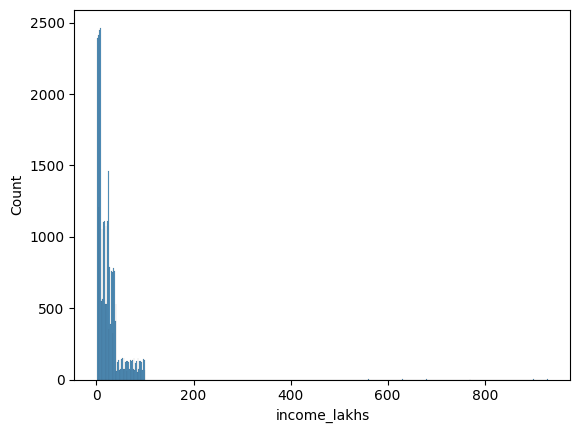

In [90]:
sns.histplot(df1["income_lakhs"])

In [91]:
def get_iqr_bounds(col):
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    return lower_bound, upper_bound

In [92]:
get_iqr_bounds(df1["income_lakhs"])

(-30.5, 69.5)

In [93]:
quantile_threshold = df1.income_lakhs.quantile(0.999)

In [94]:
df1[df1["income_lakhs"] > quantile_threshold].shape

(6, 15)

In [95]:
df2 = df1[df["income_lakhs"] < quantile_threshold]
df2.describe()

,unnamed:_0,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29754.000000,29754.000000,29754.000000,29754.000000,29754.000000,29754.0
mean,25018.735935,43.097432,2.387679,23.050884,20891.777811,0.0
std,14431.101637,11.043700,1.420724,22.178726,6929.595513,0.0
min,0.000000,26.000000,0.000000,1.000000,6538.000000,0.0
25%,12595.250000,34.000000,1.000000,7.000000,15698.250000,0.0
50%,25052.500000,42.000000,3.000000,17.000000,20480.000000,0.0
75%,37550.500000,52.000000,3.000000,32.000000,26355.750000,0.0
max,49999.000000,72.000000,5.000000,99.000000,43471.000000,0.0


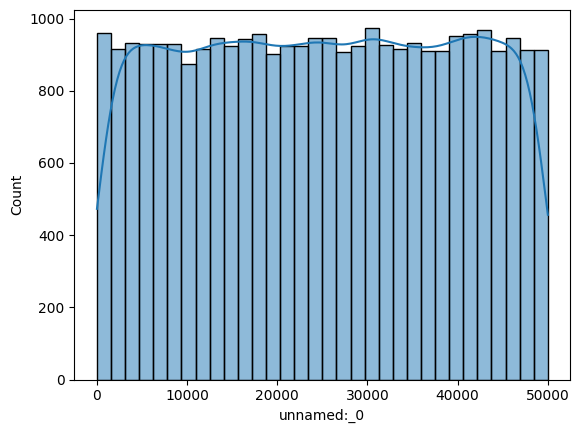

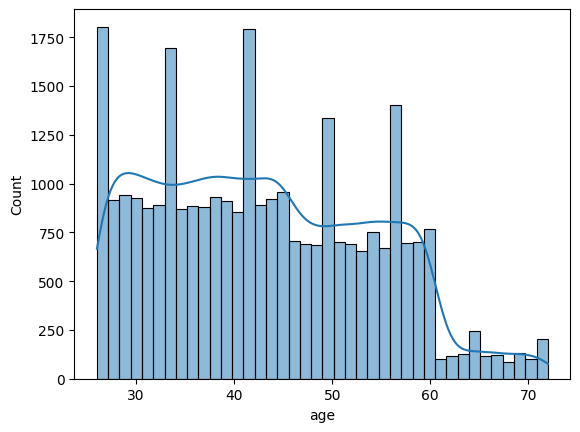

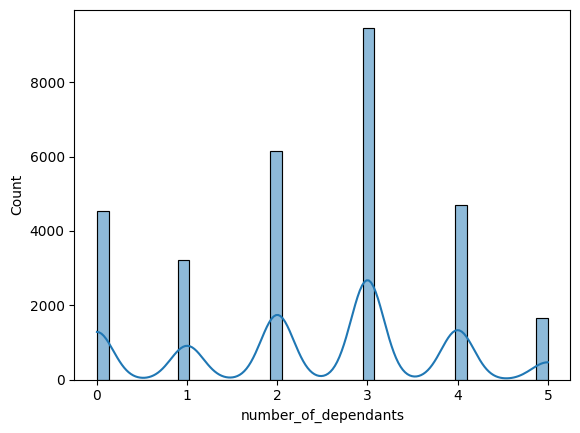

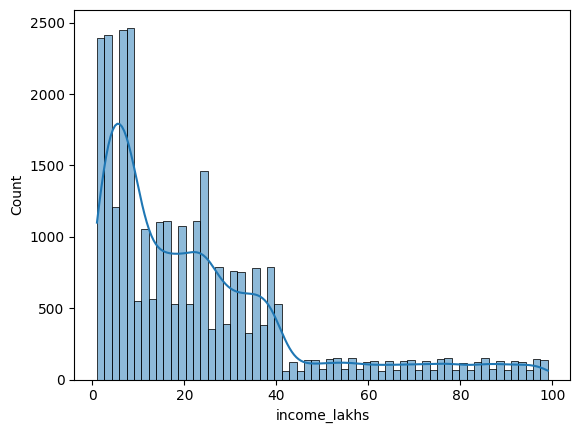

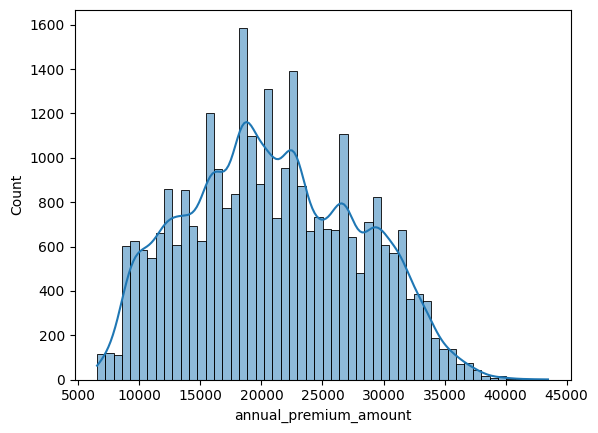

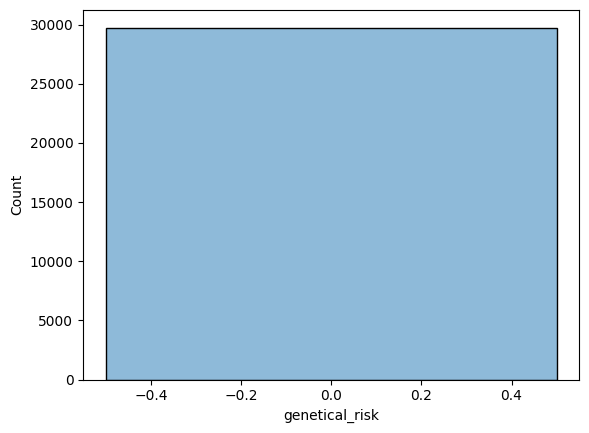

In [96]:
for col in numeric_columns:
    sns.histplot(df2[col],kde=True)
    plt.show()

<Axes: xlabel='age', ylabel='annual_premium_amount'>

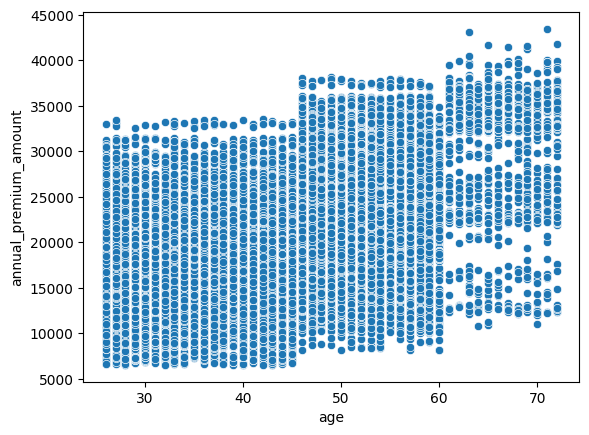

In [97]:
sns.scatterplot(df2,x="age",y="annual_premium_amount")

In [98]:
categorical_columns = df2.columns.difference(numeric_columns)

In [99]:
for col in categorical_columns:
    print(col, ":" , df2[col].unique())

bmi_category : ['Normal' 'Obesity' 'Overweight' 'Underweight']
employment_status : ['Salaried' 'Self-Employed' 'Freelancer']
gender : ['Male' 'Female']
income_level : ['<10L' '10L - 25L' '> 40L' '25L - 40L']
insurance_plan : ['Bronze' 'Silver' 'Gold']
marital_status : ['Unmarried' 'Married']
medical_history : ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
region : ['Northwest' 'Southeast' 'Northeast' 'Southwest']
smoking_status : ['No Smoking' 'Regular' 'Occasional' 'Does Not Smoke' 'Not Smoking'
 'Smoking=0']


In [100]:
df2["smoking_status"].replace({
    'Smoking=0' : 'No Smoking',
    'Does Not Smoke' : 'No Smoking',
    'Not Smoking' : 'No Smoking'
}, inplace=True)
df2["smoking_status"].unique()

array(['No Smoking', 'Regular', 'Occasional'], dtype=object)

In [101]:
pct_count = df2["gender"].value_counts(normalize=True)

<Axes: xlabel='gender'>

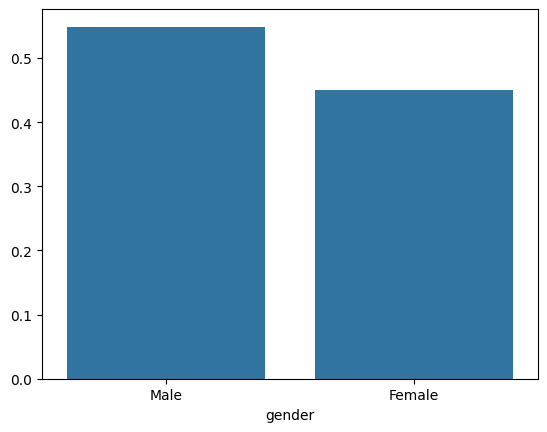

In [102]:
sns.barplot(x = pct_count.index,y = pct_count.values)

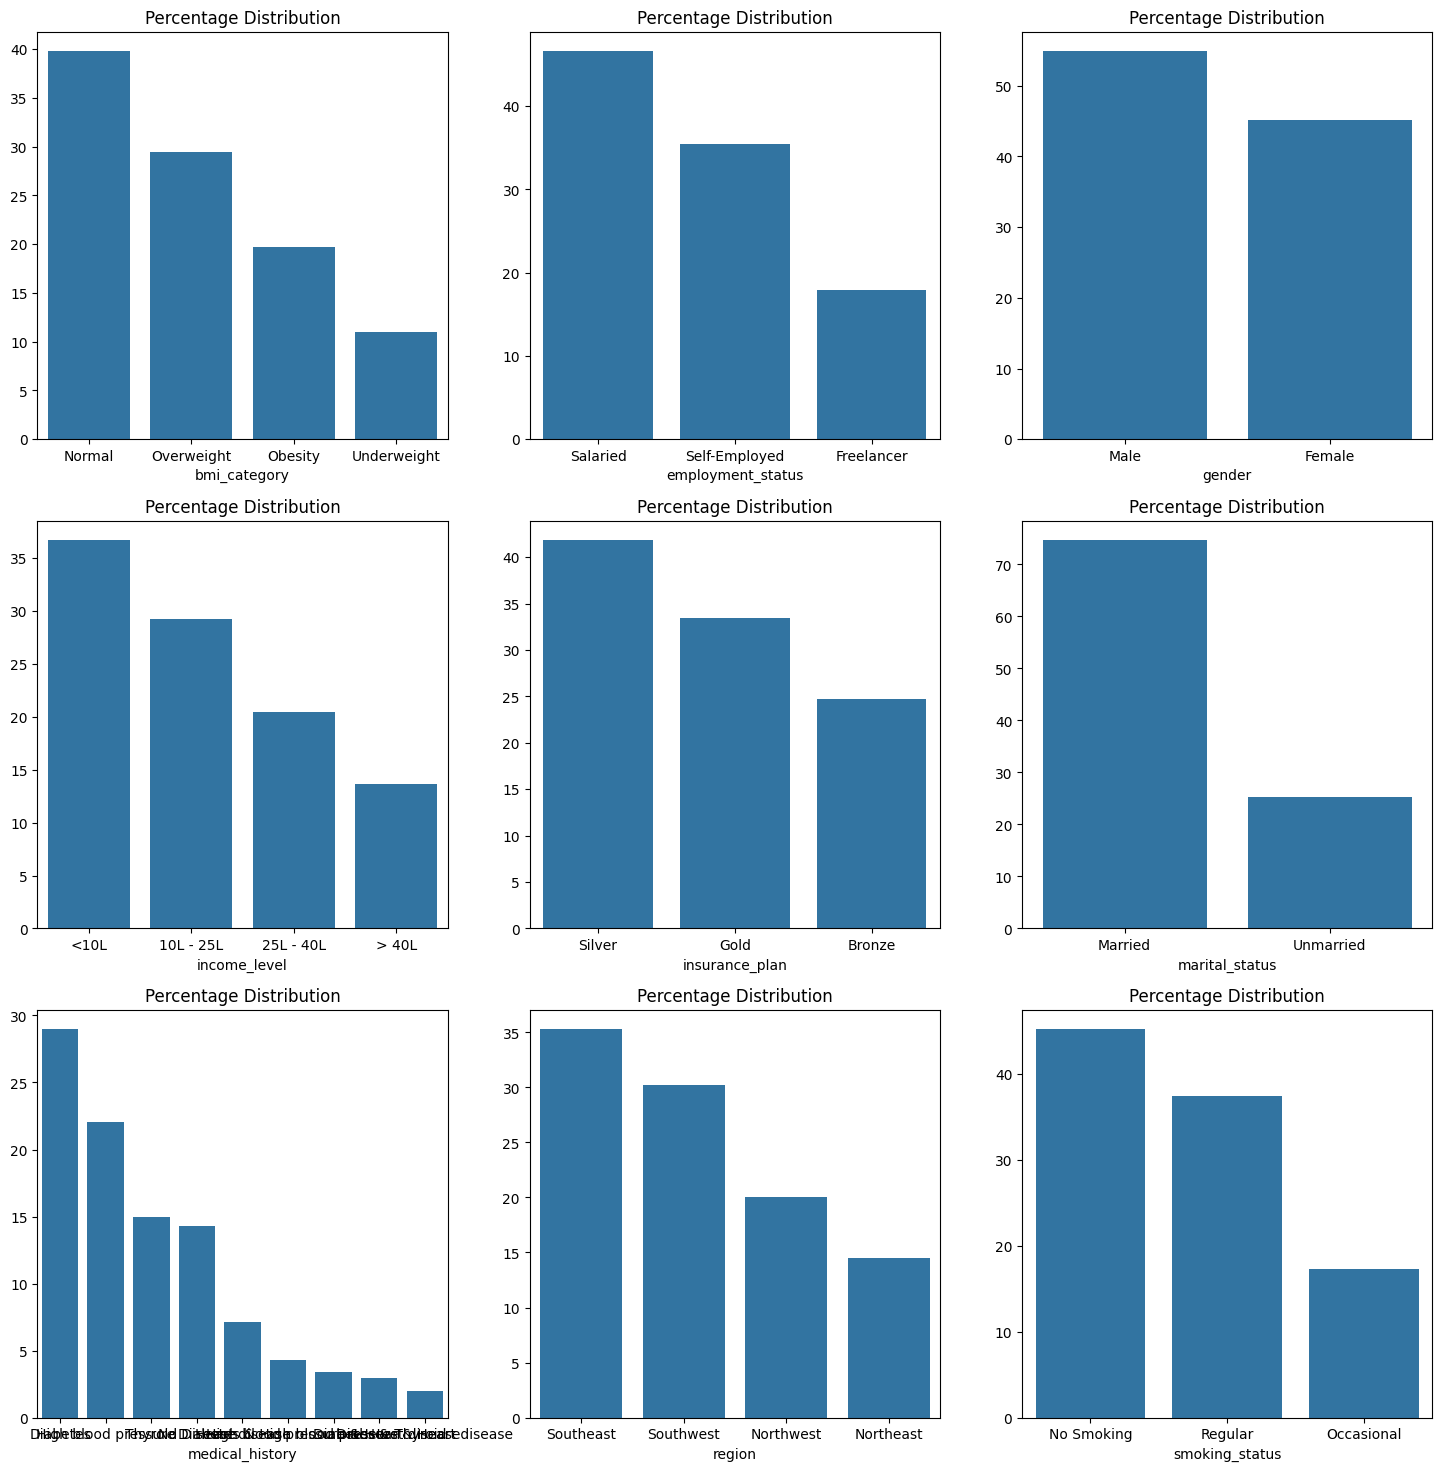

In [103]:
fig, axes = plt.subplots(3,3, figsize=(18,18))
axes = axes.flatten()

for axes, col in zip(axes,categorical_columns):
     pct_count = df2[col].value_counts(normalize=True) * 100
     sns.barplot(x = pct_count.index,y = pct_count.values,ax=axes)
     axes.set_title("Percentage Distribution")
plt.show()

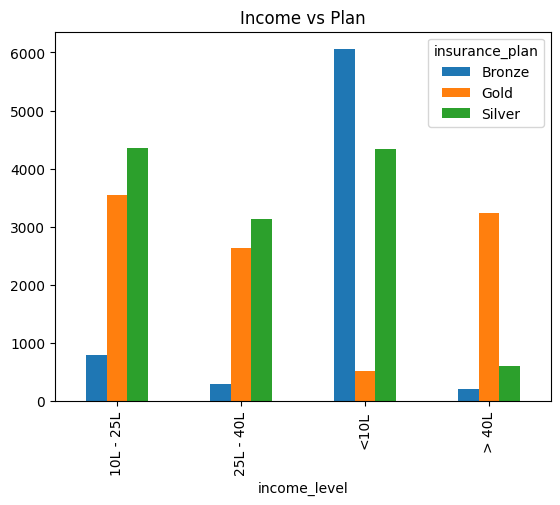

In [104]:
crosstab = pd.crosstab(df2["income_level"],df2["insurance_plan"])
crosstab.plot(kind="bar")
plt.title("Income vs Plan")
plt.show()

<Axes: xlabel='insurance_plan', ylabel='income_level'>

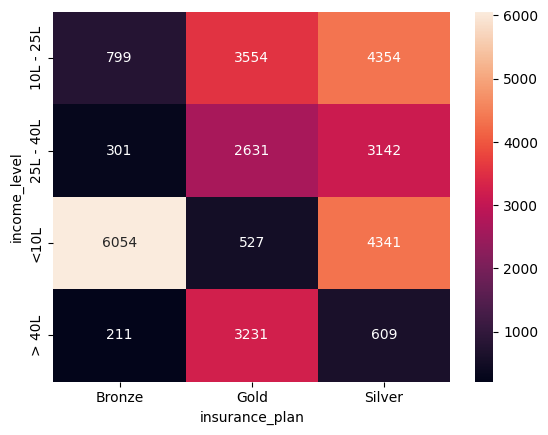

In [105]:
sns.heatmap(crosstab,annot=True,fmt='d')

In [106]:
df2.medical_history.unique()

array(['Diabetes', 'High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Thyroid', 'Heart disease',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes & Heart disease'], dtype=object)

In [107]:
risk_scores = {
    "diabetes": 6,
    "heart disease": 8,
    "high blood pressure":6,
    "thyroid": 5,
    "no disease": 0,
    "none": 0
}
df2[['disease1','disease2']] = df2["medical_history"].str.split(" & ",expand=True).apply(lambda x: x.str.lower())

In [108]:
df2

,unnamed:_0,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2
0,0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0,diabetes,None
1,1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0,diabetes,None
2,2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0,high blood pressure,None
3,3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,0,no disease,None
4,5,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610,0,diabetes,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29899,49987,60,Female,Northwest,Married,3,Normal,No Smoking,Self-Employed,25L - 40L,26,High blood pressure,Gold,26370,0,high blood pressure,None
29900,49990,40,Female,Southeast,Unmarried,0,Overweight,Regular,Salaried,10L - 25L,16,Diabetes & Thyroid,Gold,29496,0,diabetes,thyroid
29901,49992,37,Female,Northwest,Unmarried,0,Obesity,No Smoking,Salaried,<10L,4,No Disease,Bronze,10957,0,no disease,None
29902,49996,47,Female,Southeast,Married,2,Normal,No Smoking,Salaried,> 40L,82,Thyroid,Gold,27076,0,thyroid,None


In [109]:
df2['disease1'].fillna('none', inplace=True)
df2['disease2'].fillna('none', inplace=True)
df2['total_risk_score'] = 0

for disease in ['disease1','disease2']:
    df2['total_risk_score'] += df2[disease].map(risk_scores)

max_score = df2["total_risk_score"].max()
min_score = df2["total_risk_score"].min()

df2["normalized_risk_score"] = (df2['total_risk_score'] - min_score) / (max_score - min_score)
df2.head()

,unnamed:_0,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
0,0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0,diabetes,none,6,0.428571
1,1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0,diabetes,none,6,0.428571
2,2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0,high blood pressure,none,6,0.428571
3,3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,0,no disease,none,0,0.000000
4,5,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610,0,diabetes,none,6,0.428571


In [110]:
df2.insurance_plan.unique()

array(['Bronze', 'Silver', 'Gold'], dtype=object)

In [111]:
df2["insurance_plan"] = df2["insurance_plan"].map({
    "Bronze":1,
    "Silver":2,
    "Gold":3
})

df2["income_level"] = df2["income_level"].map({'<10L':1, '10L - 25L': 2, '25L - 40L':3, '> 40L':4})
df2.head()

,unnamed:_0,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
0,0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,1,6,Diabetes,1,9053,0,diabetes,none,6,0.428571
1,1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,1,6,Diabetes,1,16339,0,diabetes,none,6,0.428571
2,2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,2,20,High blood pressure,2,18164,0,high blood pressure,none,6,0.428571
3,3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,4,77,No Disease,3,20303,0,no disease,none,0,0.000000
4,5,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,2,14,Diabetes,1,15610,0,diabetes,none,6,0.428571


In [112]:
nominal_columns = ["gender","region","marital_status","bmi_category","smoking_status","employment_status"]
df3 = pd.get_dummies(df2, columns=nominal_columns,drop_first=True, dtype=int)
df3.head()

,unnamed:_0,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0,26,0,1,6,Diabetes,1,9053,0,diabetes,...,0,0,1,0,0,0,0,0,1,0
1,1,29,2,1,6,Diabetes,1,16339,0,diabetes,...,1,0,0,1,0,0,0,1,1,0
2,2,49,2,2,20,High blood pressure,2,18164,0,high blood pressure,...,0,0,0,0,0,0,0,0,0,1
3,3,30,3,4,77,No Disease,3,20303,0,no disease,...,1,0,0,0,0,0,0,0,1,0
4,5,56,3,2,14,Diabetes,1,15610,0,diabetes,...,0,0,0,1,0,0,1,0,0,1


In [113]:
df4 = df3.drop(['medical_history','disease1','disease2','total_risk_score'],axis=1)
df4.head()

,unnamed:_0,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalized_risk_score,gender_Male,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0,26,0,1,6,1,9053,0,0.428571,1,...,0,0,1,0,0,0,0,0,1,0
1,1,29,2,1,6,1,16339,0,0.428571,0,...,1,0,0,1,0,0,0,1,1,0
2,2,49,2,2,20,2,18164,0,0.428571,0,...,0,0,0,0,0,0,0,0,0,1
3,3,30,3,4,77,3,20303,0,0.000000,0,...,1,0,0,0,0,0,0,0,1,0
4,5,56,3,2,14,1,15610,0,0.428571,1,...,0,0,0,1,0,0,1,0,0,1


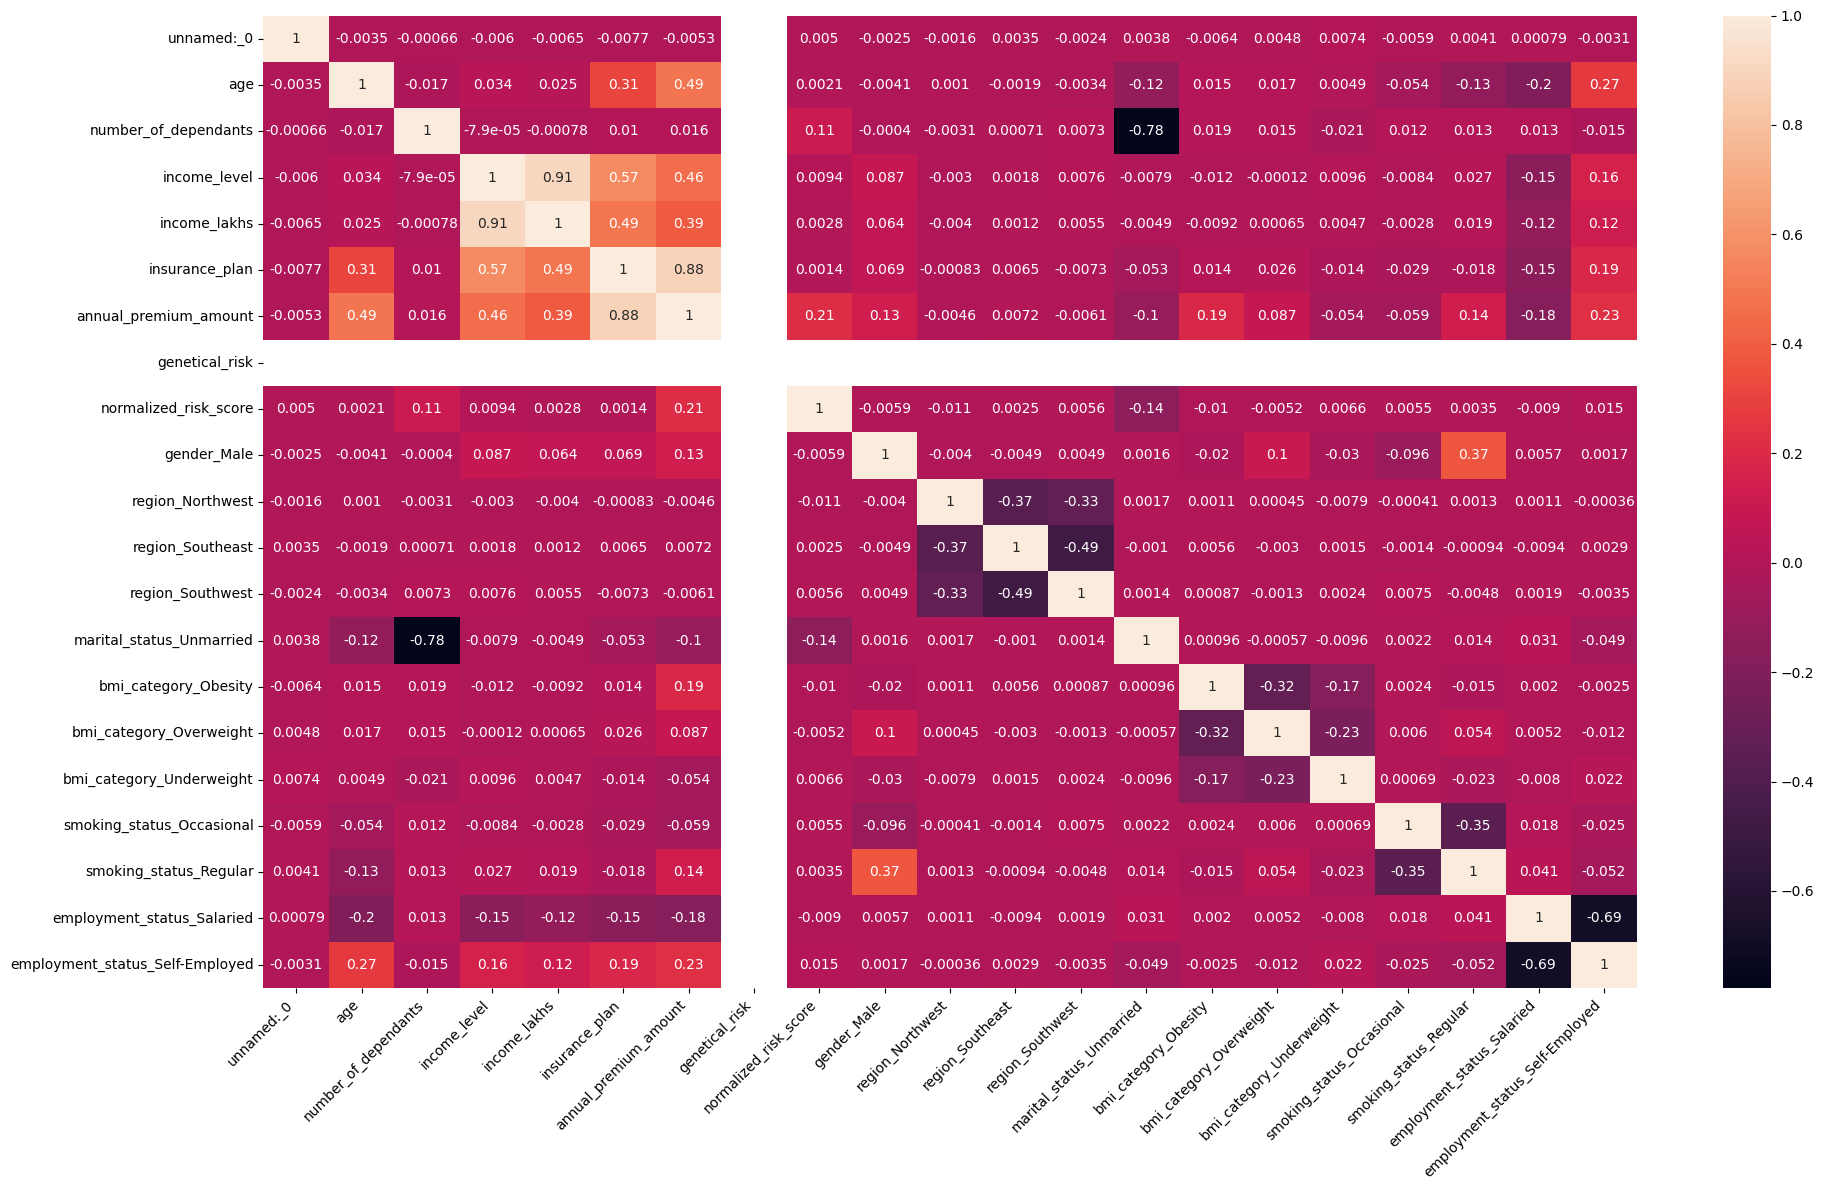

In [114]:
cm = df4.corr()

plt.figure(figsize=(20,12))
sns.heatmap(cm, annot=True)
plt.xticks(rotation=45,ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [115]:
X = df4.drop('annual_premium_amount', axis='columns')
y = df4['annual_premium_amount']

from sklearn.preprocessing import MinMaxScaler
col_to_scale = ['age','number_of_dependants','income_level','income_lakhs','insurance_plan','genetical_risk']
scaler = MinMaxScaler()

X[col_to_scale] = scaler.fit_transform(X[col_to_scale])
X

,unnamed:_0,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0,0.000000,0.0,0.000000,0.051020,0.0,0.0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,1,0.065217,0.4,0.000000,0.051020,0.0,0.0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,2,0.500000,0.4,0.333333,0.193878,0.5,0.0,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,3,0.086957,0.6,1.000000,0.775510,1.0,0.0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,5,0.652174,0.6,0.333333,0.132653,0.0,0.0,0.428571,1,0,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29899,49987,0.739130,0.6,0.666667,0.255102,1.0,0.0,0.428571,0,1,0,0,0,0,0,0,0,0,0,1
29900,49990,0.304348,0.0,0.333333,0.153061,1.0,0.0,0.785714,0,0,1,0,1,0,1,0,0,1,1,0
29901,49992,0.239130,0.0,0.000000,0.030612,0.0,0.0,0.000000,0,1,0,0,1,1,0,0,0,0,1,0
29902,49996,0.456522,0.4,1.000000,0.826531,1.0,0.0,0.357143,0,0,1,0,0,0,0,0,0,0,1,0


In [116]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df["Column"] = data.columns
    vif_df["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_df

In [117]:
calculate_vif(X)

,Column,VIF
0,unnamed:_0,3.705372
1,age,3.960279
2,number_of_dependants,6.572685
3,income_level,14.063936
4,income_lakhs,11.408796
5,insurance_plan,5.262382
6,genetical_risk,NaN
7,normalized_risk_score,3.846207
8,gender_Male,2.600019
9,region_Northwest,2.142787


In [118]:
calculate_vif(X.drop("income_level",axis="columns"))

,Column,VIF
0,unnamed:_0,3.705235
1,age,3.900066
2,number_of_dependants,6.572226
3,income_lakhs,2.692104
4,insurance_plan,4.573745
5,genetical_risk,NaN
6,normalized_risk_score,3.844185
7,gender_Male,2.592365
8,region_Northwest,2.142166
9,region_Southeast,3.014583


In [119]:
X_reduced = X.drop("income_level",axis="columns")

### Model Training

In [120]:
x_train,x_test,y_train,y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=10)

In [121]:
model_liner = LinearRegression()
model_liner.fit(x_train,y_train)
model_liner.score(x_test,y_test)

0.9529821270977689

In [122]:
y_pred = model_liner.predict(x_test)

mse_lr = mean_squared_error(y_test,y_pred)
rmse_lr = np.sqrt(mse_lr)
print("XGBoost Regression ==> MSE: ",mse_lr," RMSE: ",rmse_lr)

XGBoost Regression ==> MSE:  2265706.729250745  RMSE:  1505.2264710835857


In [123]:
model_liner.coef_, model_liner.intercept_

(array([ 5.26890777e-04,  6.96360331e+03, -1.31319927e+03, -7.51754586e+02,
         1.48578960e+04, -5.45696821e-12,  6.02512922e+03,  5.29734311e+01,
        -4.18883298e+01, -4.31813593e+00, -5.50504639e+00, -7.20733641e+02,
         3.95836266e+03,  2.01681847e+03,  6.05000331e+02,  8.29290959e+02,
         2.80102384e+03, -8.16502983e+01,  2.46457569e+02]),
 np.float64(5921.031238634243))

In [124]:
feature_importances = model_liner.coef_

coef_df = pd.DataFrame(feature_importances, index=x_test.columns,columns=['Coefficients'])

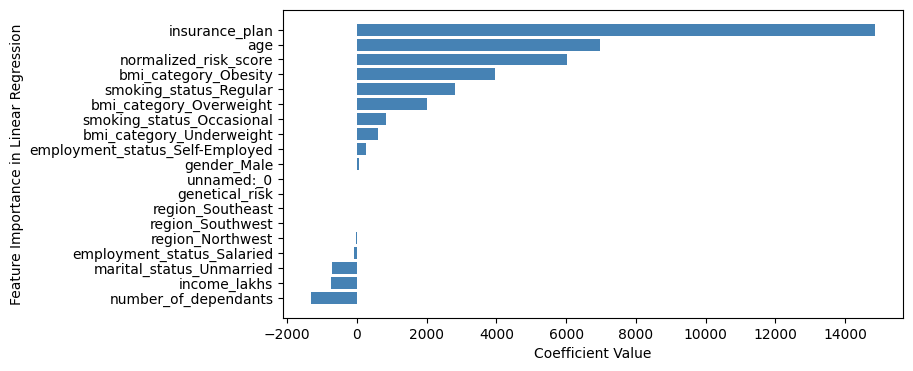

In [125]:
coef_df = coef_df.sort_values(by="Coefficients", ascending=True)
plt.figure(figsize=(8,4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature Importance in Linear Regression')
plt.show()

In [126]:
model_ridge = Ridge(alpha=10)
model_ridge.fit(x_train,y_train)
model_ridge.score(x_test,y_test)

0.952978233551492

In [127]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor()
model_xgb.fit(x_train,y_train)
model_xgb.score(x_test,y_test)

0.9980199933052063

In [128]:
y_pred = model_xgb.predict(x_test)

mse_lr = mean_squared_error(y_test,y_pred)
rmse_lr = np.sqrt(mse_lr)
print("XGBoost Regression ==> MSE: ",mse_lr," RMSE: ",rmse_lr)

XGBoost Regression ==> MSE:  95413.0546875  RMSE:  308.89003656236633


In [129]:
model_xgb = XGBRegressor()
param_grid = {
    'n_estimators': [20, 40, 50],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}
random_search = RandomizedSearchCV(model_xgb, param_grid, n_iter=10, cv=3, scoring='r2', random_state=42, n_jobs=-1)
random_search.fit(x_train, y_train)
random_search.best_score_

np.float64(0.997018019358317)

In [130]:
random_search.best_params_

{'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}

In [131]:
best_model = random_search.best_estimator_

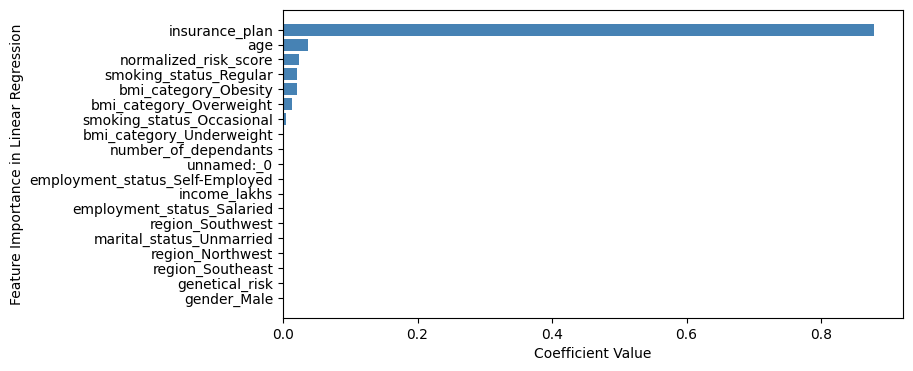

In [132]:
feature_importances = best_model.feature_importances_

coef_df = pd.DataFrame(feature_importances, index=x_test.columns,columns=['Coefficients'])
coef_df = coef_df.sort_values(by="Coefficients", ascending=True)
plt.figure(figsize=(8,4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature Importance in Linear Regression')
plt.show()

### Error Analysis 

In [133]:
y_pred = best_model.predict(x_test)

residuals = y_pred - y_test
residuals_pct = residuals*100/y_test

results_df = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred,
    'diff': residuals,
    'percentage': residuals_pct
})
results_df.head()

,actual,predicted,diff,percentage
18272,12370,12062.123047,-307.876953,-2.488900
24662,11253,11754.593750,501.593750,4.457422
1789,30688,30557.410156,-130.589844,-0.425540
29834,22139,22555.171875,416.171875,1.879813
1478,27040,27360.625000,320.625000,1.185743


<Axes: xlabel='percentage', ylabel='Count'>

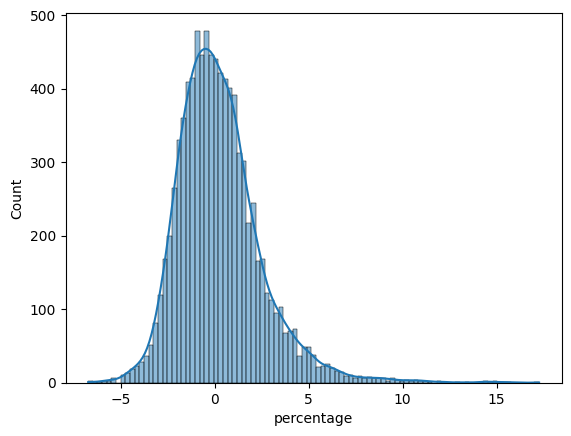

In [134]:
sns.histplot(results_df['percentage'],kde=True)

In [135]:
extreme_error_threshold = 10 
extreme_results_df = results_df[np.abs(results_df["percentage"]) > extreme_error_threshold]

In [136]:
extreme_results_df.shape

(35, 4)

In [137]:
extreme_pct = extreme_results_df.shape[0]*100/results_df.shape[0]
extreme_pct

0.39206900414472945

In [138]:
results_df[np.abs(results_df["percentage"]) > 50].sort_values('percentage',ascending=False)

,actual,predicted,diff,percentage


In [139]:
extreme_errors_df = x_test.loc[extreme_results_df.index]

In [140]:
extreme_errors_df

,unnamed:_0,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
6163,10368,0.217391,0.0,0.000000,0.0,0.0,0.000000,0,0,0,1,1,0,0,0,0,0,0,0
14728,24695,0.413043,0.0,0.061224,0.0,0.0,0.000000,1,1,0,0,1,0,0,0,0,0,0,1
1549,2546,0.065217,0.8,0.020408,0.0,0.0,0.428571,1,0,1,0,0,0,0,0,0,0,1,0
9756,16367,0.326087,0.4,0.061224,0.0,0.0,0.000000,0,1,0,0,0,0,0,0,0,0,1,0
29165,48728,0.195652,0.8,0.020408,0.0,0.0,0.428571,0,1,0,0,0,0,0,0,0,0,1,0
6369,10713,0.086957,0.4,0.020408,0.0,0.0,0.428571,0,0,0,0,0,0,0,0,0,0,1,0
13744,23075,0.304348,0.2,0.081633,0.0,0.0,0.000000,0,0,0,1,1,0,0,0,0,0,0,1
3979,6608,0.347826,0.6,0.051020,0.0,0.0,0.000000,1,1,0,0,0,0,0,0,0,0,1,0
13973,23452,0.152174,0.8,0.030612,0.0,0.0,0.857143,0,1,0,0,0,0,0,0,0,0,0,1
22941,38445,0.152174,0.0,0.020408,0.0,0.0,0.000000,0,0,0,1,1,0,0,0,0,0,1,0


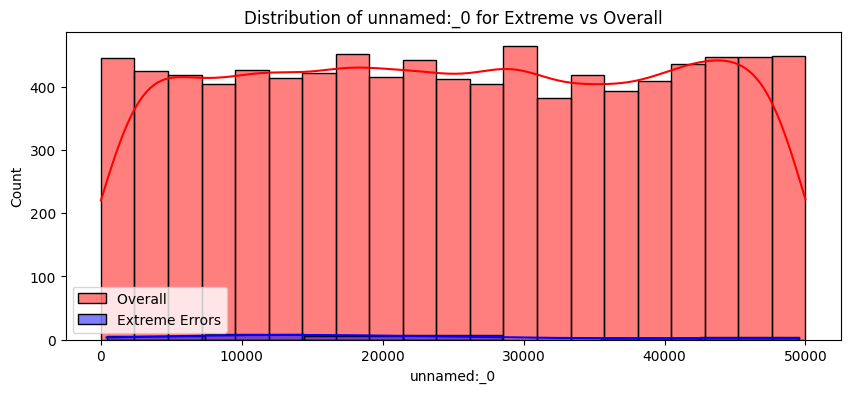

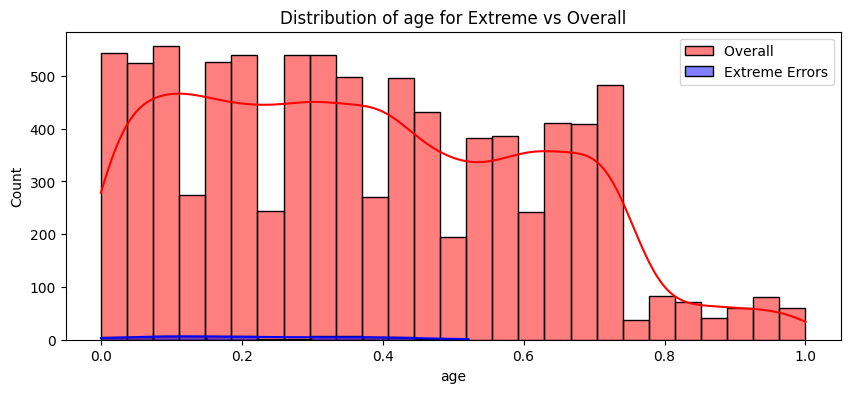

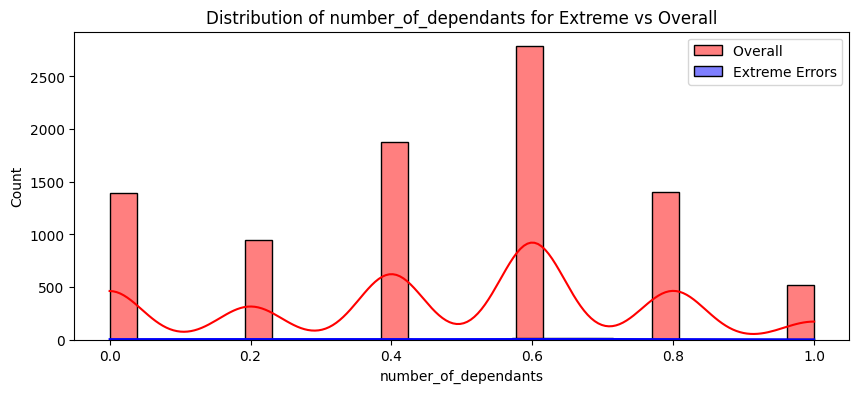

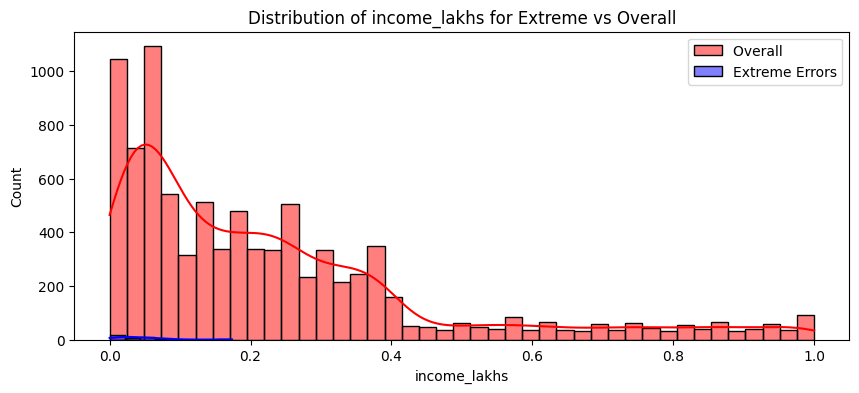

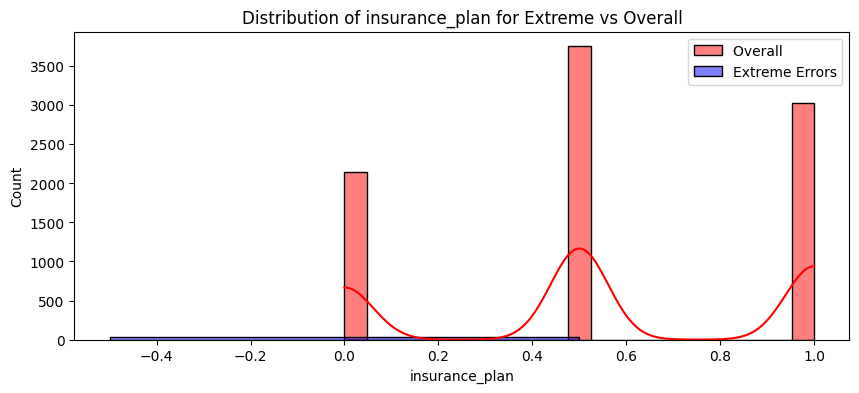

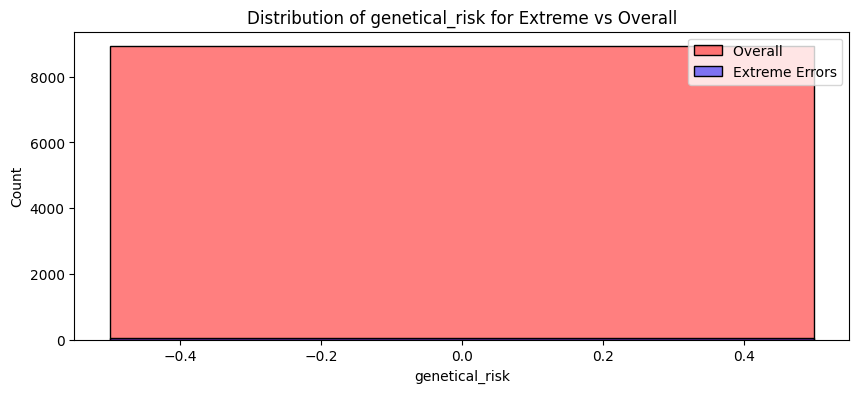

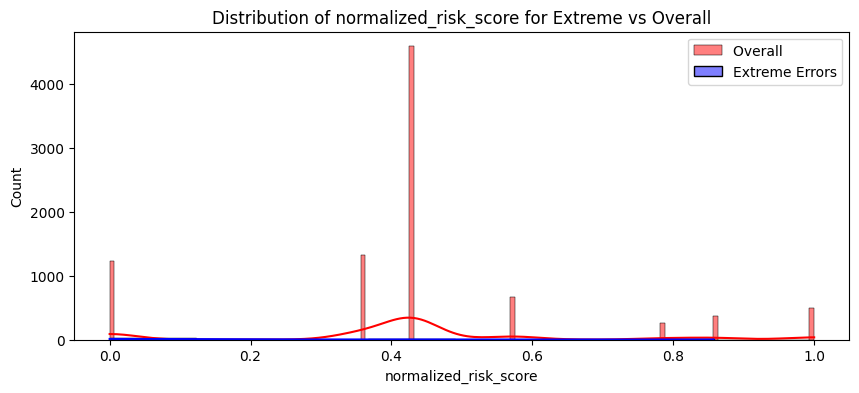

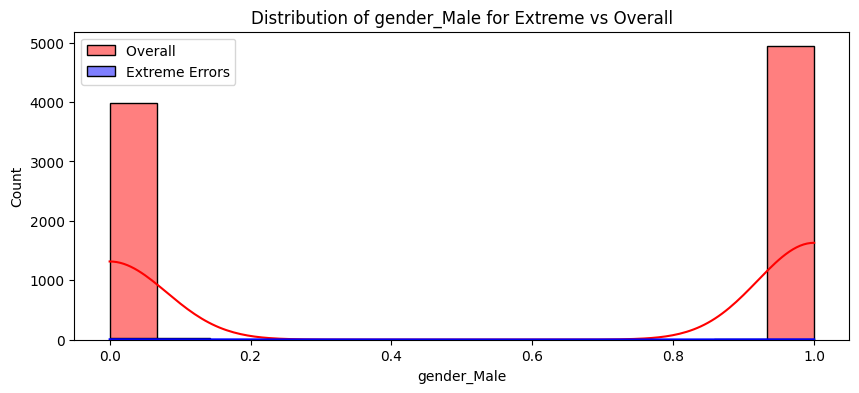

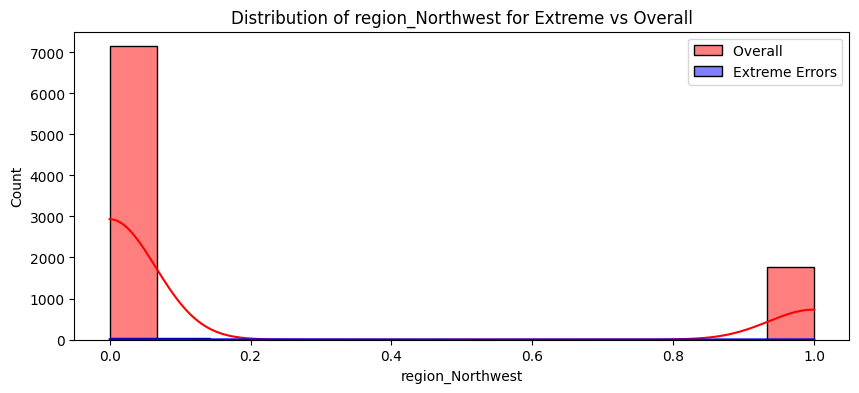

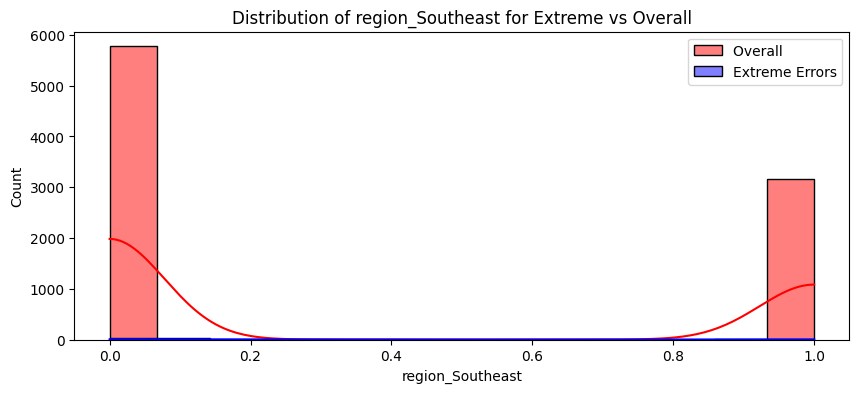

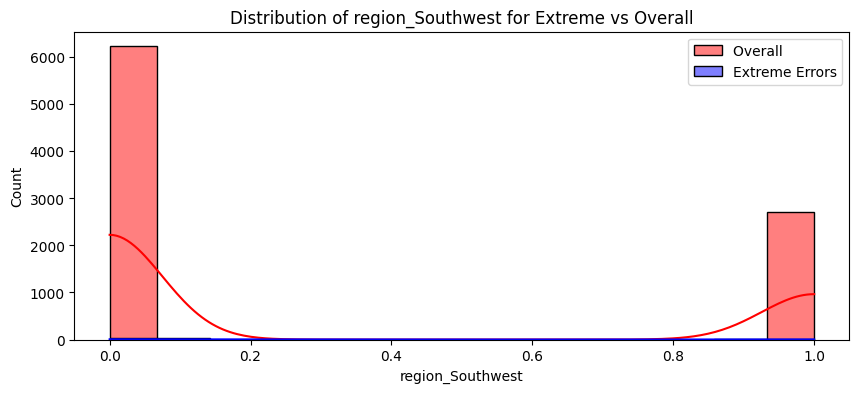

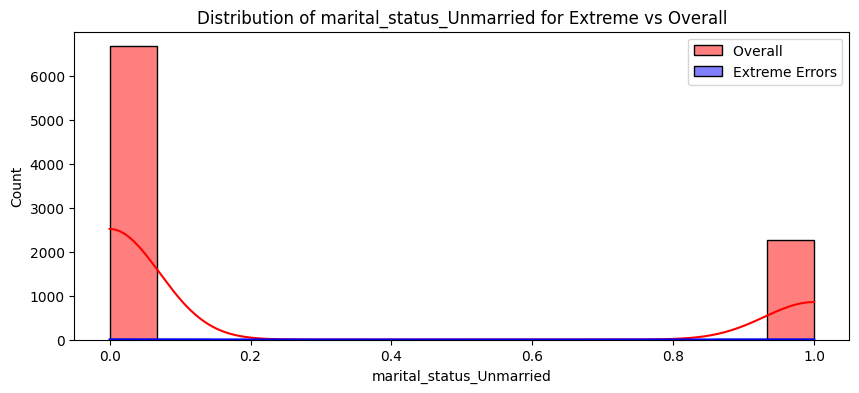

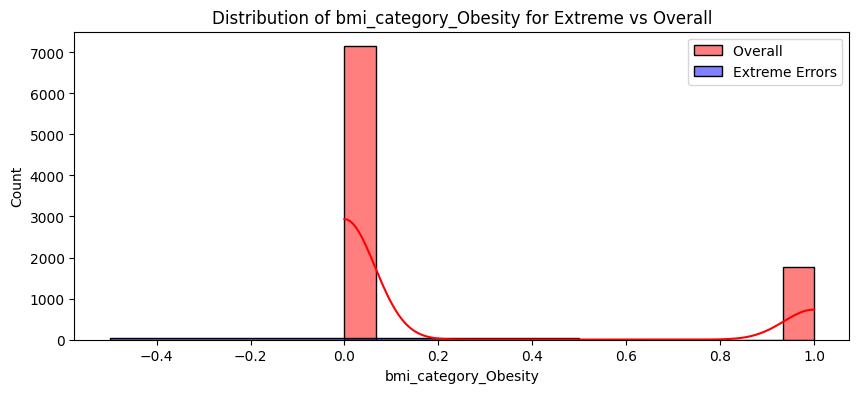

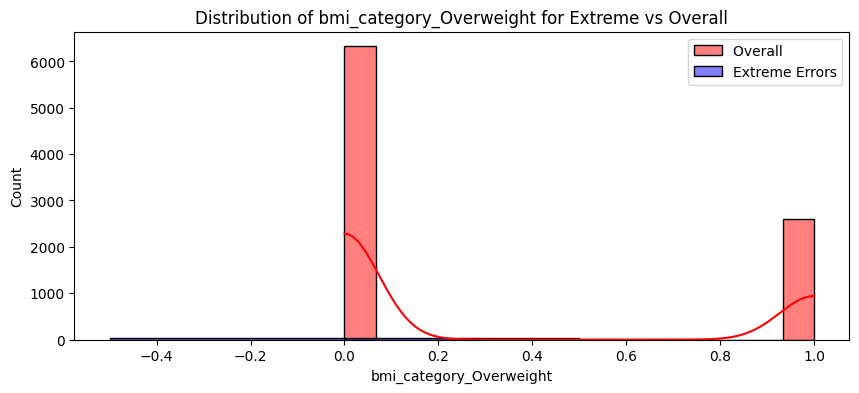

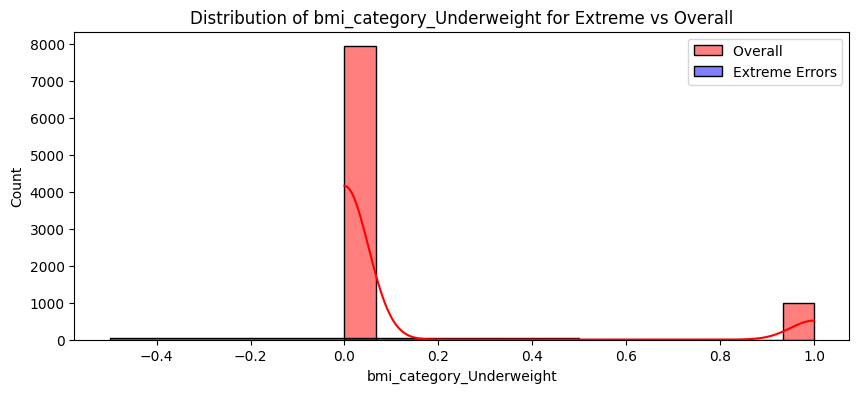

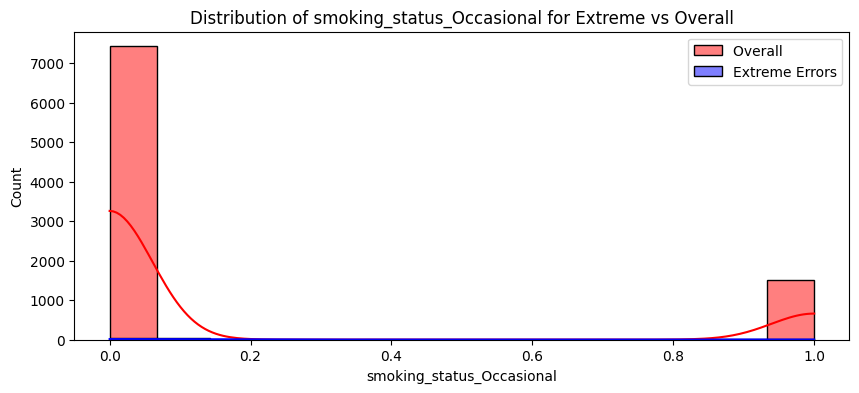

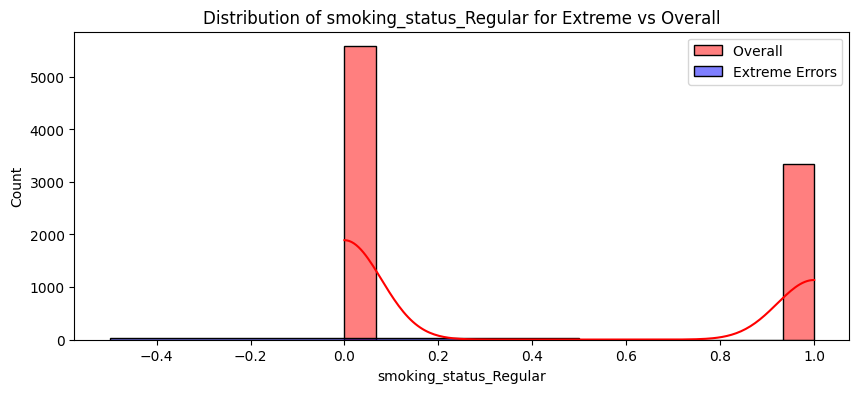

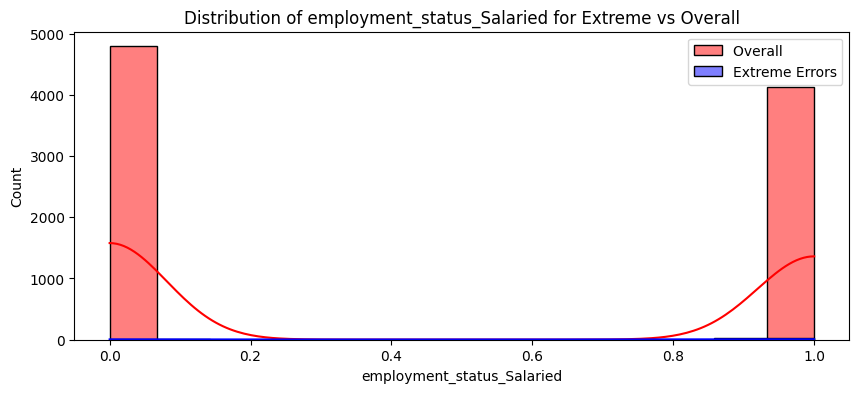

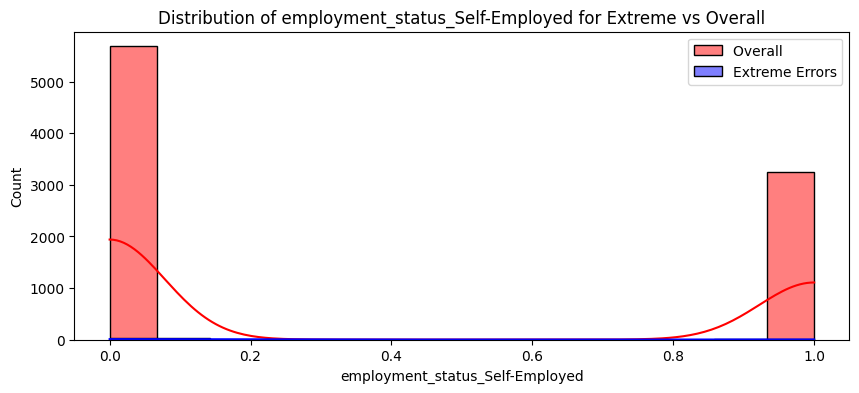

In [141]:
for feature in x_test.columns:
    plt.figure(figsize=(10,4))
    sns.histplot(x_test[feature],label="Overall ",kde=True,color='red')
    sns.histplot(extreme_errors_df[feature],label="Extreme Errors",kde=True,color='blue')
    plt.legend()
    plt.title(f"Distribution of {feature} for Extreme vs Overall")
    plt.show()

In [143]:
col_to_scale

['age',
 'number_of_dependants',
 'income_level',
 'income_lakhs',
 'insurance_plan',
 'genetical_risk']

In [144]:
from joblib import dump

dump(best_model, "artifacts/model_rest.joblib")

scaler_with_cols = {
    'scaler': scaler,
    'cols_to_scale': col_to_scale
}

dump(scaler_with_cols, 'artifacts/scaler_rest.joblib')

['artifacts/scaler_rest.joblib']